In [1]:
import pandas as pd

# Load the Excel file into a DataFrame
excel_file_path = '../Data_sampling/Data_after_Smote.xlsx'
df = pd.read_excel(excel_file_path)

In [2]:
df.describe()

,LCOM5,NL,NLE,WMC,CBO,CBOI,NII,NOI,RFC,CLOC,...,NLM,NLPM,NOS,TLLOC,TLOC,TNLG,TNLM,TNLPM,TNOS,Refact_Sum
count,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,...,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000
mean,2.735143,1.512933,1.325780,22.700727,8.402095,6.625909,8.454575,10.283775,20.773087,30.967294,...,10.273301,7.892369,68.020628,128.935549,181.376550,2.495511,12.145361,9.568619,72.745938,0.500000
std,4.893081,1.746079,1.407205,35.067735,10.418118,27.941170,34.927133,18.126274,28.744049,75.054962,...,13.832734,11.510795,166.853316,237.016976,334.082394,5.418921,16.459523,13.822595,176.006164,0.500027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,4.000000,0.000000,...,2.000000,2.000000,5.000000,19.000000,24.000000,0.000000,2.000000,2.000000,6.000000,0.000000
50%,1.000000,1.000000,1.000000,9.000000,4.000000,1.000000,1.000000,4.000000,10.000000,5.000000,...,5.000000,4.000000,22.000000,52.000000,68.000000,0.000000,6.000000,5.000000,24.000000,0.500000
75%,3.000000,2.000000,2.000000,25.000000,10.000000,4.000000,4.000000,11.000000,24.000000,22.000000,...,11.000000,9.000000,64.000000,147.000000,205.000000,2.000000,14.000000,11.000000,73.000000,1.000000
max,78.000000,18.000000,9.000000,413.000000,124.000000,409.000000,503.000000,223.000000,299.000000,613.000000,...,133.000000,103.000000,3036.000000,3785.000000,4888.000000,50.000000,133.000000,120.000000,3207.000000,1.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def plot_histogram(feature):
    plt.figure(figsize=(8, 6))
    sns.histplot(feature, kde=True)
    plt.title('Histogram of {}'.format(feature.name))
    plt.xlabel(feature.name)
    plt.ylabel('Frequency')
    plt.show()

def plot_boxplot(feature):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=feature)
    plt.title('Boxplot of {}'.format(feature.name))
    plt.ylabel(feature.name)
    plt.show()

def plot_countplot(feature):
    plt.figure(figsize=(20, 6))
    sns.countplot(x=feature)
    plt.title('Countplot of {}'.format(feature.name))
    plt.xlabel(feature.name)
    plt.ylabel('Count')
    plt.show()

In [10]:
# plot_histogram(df['LCOM5'])


In [11]:
# plot_boxplot(df['LCOM5'])


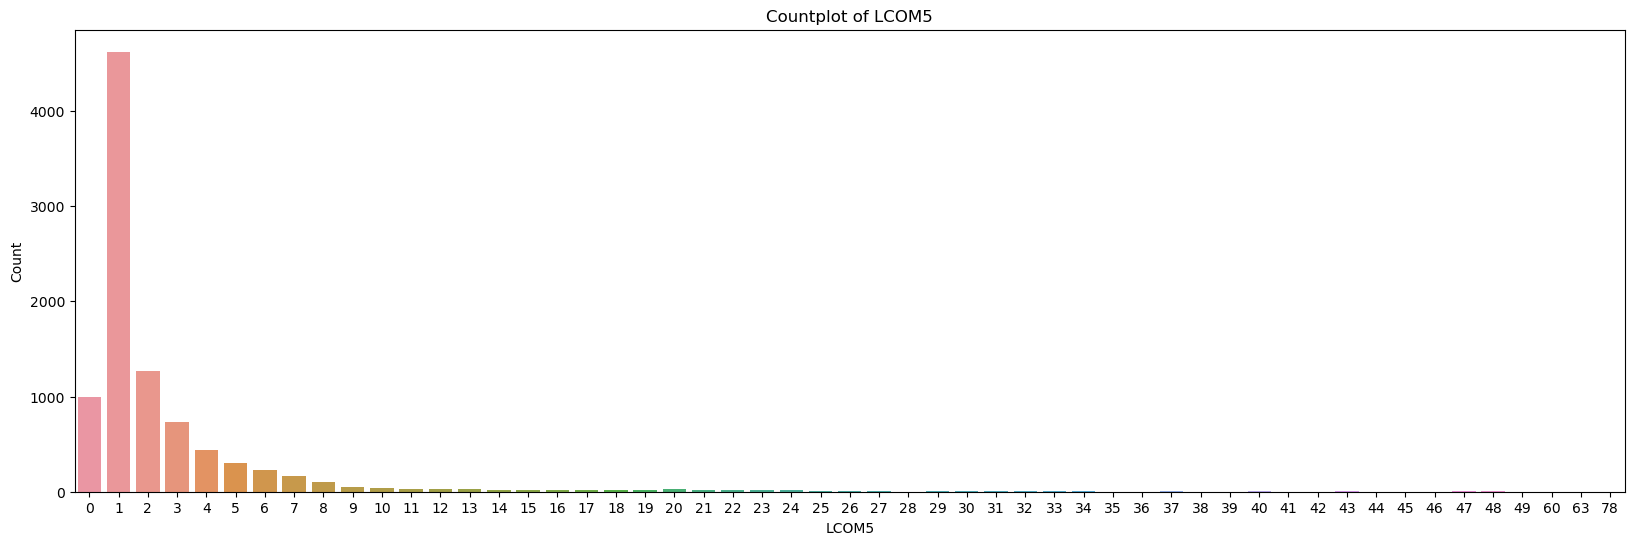

In [12]:
plot_countplot(df['LCOM5'])

### Method: Normalization:

Data normalization is a fundamental component, It entails transforming the data, or turning the source data into another format that enables for successful data processing. 

The MinMaxScaler transforms features by scaling each feature to a given range. This range can be set by specifying the feature_range parameter (default at $(0,1)$). 

This scaler works better for cases where the distribution is not Gaussian or the standard deviation is very small. However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider another scaler.

$$x\_scaled = \dfrac{(x-min(x))}{(max(x)–min(x))}$$

In [13]:
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

In [14]:
df_normalized = min_max_scaling(df)


In [15]:
df.describe()

,LCOM5,NL,NLE,WMC,CBO,CBOI,NII,NOI,RFC,CLOC,...,NLM,NLPM,NOS,TLLOC,TLOC,TNLG,TNLM,TNLPM,TNOS,Refact_Sum
count,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,...,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000
mean,2.735143,1.512933,1.325780,22.700727,8.402095,6.625909,8.454575,10.283775,20.773087,30.967294,...,10.273301,7.892369,68.020628,128.935549,181.376550,2.495511,12.145361,9.568619,72.745938,0.500000
std,4.893081,1.746079,1.407205,35.067735,10.418118,27.941170,34.927133,18.126274,28.744049,75.054962,...,13.832734,11.510795,166.853316,237.016976,334.082394,5.418921,16.459523,13.822595,176.006164,0.500027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,4.000000,0.000000,...,2.000000,2.000000,5.000000,19.000000,24.000000,0.000000,2.000000,2.000000,6.000000,0.000000
50%,1.000000,1.000000,1.000000,9.000000,4.000000,1.000000,1.000000,4.000000,10.000000,5.000000,...,5.000000,4.000000,22.000000,52.000000,68.000000,0.000000,6.000000,5.000000,24.000000,0.500000
75%,3.000000,2.000000,2.000000,25.000000,10.000000,4.000000,4.000000,11.000000,24.000000,22.000000,...,11.000000,9.000000,64.000000,147.000000,205.000000,2.000000,14.000000,11.000000,73.000000,1.000000
max,78.000000,18.000000,9.000000,413.000000,124.000000,409.000000,503.000000,223.000000,299.000000,613.000000,...,133.000000,103.000000,3036.000000,3785.000000,4888.000000,50.000000,133.000000,120.000000,3207.000000,1.000000


In [16]:
df_normalized.describe()

,LCOM5,NL,NLE,WMC,CBO,CBOI,NII,NOI,RFC,CLOC,...,NLM,NLPM,NOS,TLLOC,TLOC,TNLG,TNLM,TNLPM,TNOS,Refact_Sum
count,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,...,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000
mean,0.035066,0.084052,0.147309,0.054965,0.067759,0.016200,0.016808,0.046116,0.069475,0.050518,...,0.077243,0.076625,0.022405,0.033810,0.036909,0.049910,0.091319,0.079738,0.022683,0.500000
std,0.062732,0.097004,0.156356,0.084910,0.084017,0.068316,0.069438,0.081284,0.096134,0.122439,...,0.104006,0.111755,0.054958,0.062637,0.068361,0.108378,0.123756,0.115188,0.054882,0.500027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.012821,0.000000,0.000000,0.007264,0.016129,0.000000,0.000000,0.000000,0.013378,0.000000,...,0.015038,0.019417,0.001647,0.004757,0.004706,0.000000,0.015038,0.016667,0.001871,0.000000
50%,0.012821,0.055556,0.111111,0.021792,0.032258,0.002445,0.001988,0.017937,0.033445,0.008157,...,0.037594,0.038835,0.007246,0.013478,0.013710,0.000000,0.045113,0.041667,0.007484,0.500000
75%,0.038462,0.111111,0.222222,0.060533,0.080645,0.009780,0.007952,0.049327,0.080268,0.035889,...,0.082707,0.087379,0.021080,0.038584,0.041743,0.040000,0.105263,0.091667,0.022763,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


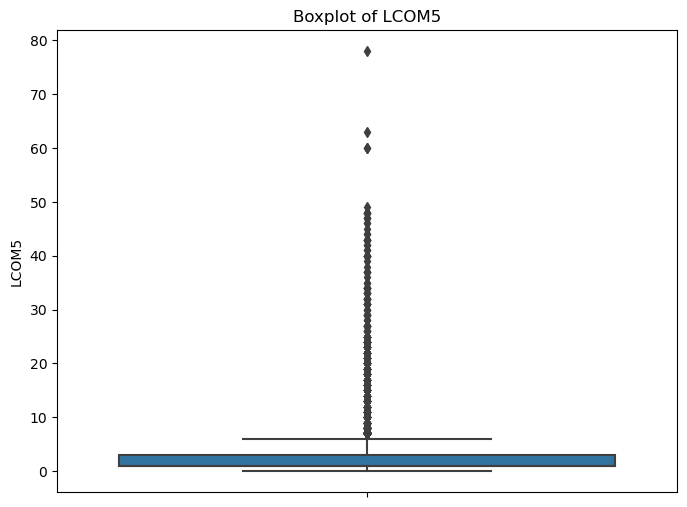

In [17]:
plot_boxplot(df['LCOM5'])


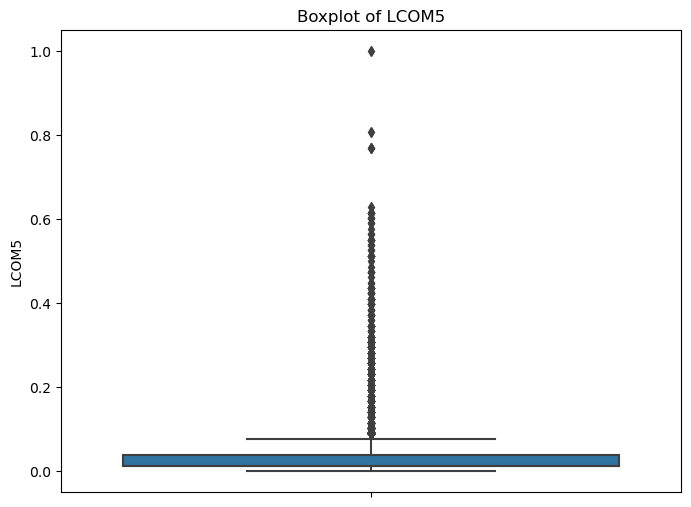

In [18]:
plot_boxplot(df_normalized['LCOM5'])


In [19]:
# Save the DataFrame to an Excel 
df_normalized.to_excel('./Ds_after_Normalization.xlsx', index=False)